# Titanic Project

# Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#printing first five rows of the dataset using .head()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#printing the shape of the dataset
df.shape

(891, 12)

In [5]:
#find some more information from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#There are 5 columns present in the dataset having categorical data and we need to convert them into numerical data. It can be done by using LabelEncoder

In [7]:
#checking the null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have null values present in Age column , Cabin column and Embarked column so we can replace the nan values using numpy and simple imputer

There are lots of missing value in cabin so we cannot able to fill the nan values because its too high in number better we can drop the column and will continue.

In [8]:
#Finnding out columns names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#Dropping cabin column
df=df.drop(columns= 'Cabin',axis=1)

In [10]:
#checking the dataset after dropping cabin column
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
#Replacing the values in Age column with mean
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [13]:
#Finding the mode for Embarked column so that we can replace with more occuring value in that column
print(df['Embarked'].mode())

0    S
dtype: object


Most occuring values is 'S' so we can replace the missing values  with 'S'. we used mode option because it is a categorical column , we cannot use mean for categoricl column.

In [17]:
#Replacing the values in Embarked column with S value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [18]:
#After replacing the missing values in three column , we can check the null values onc second
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
#now checking the dataset again
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Exploratory Data Analysis

In [20]:
#checking the Stastical information
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
#Finding the number of people survived in the ship also finding number of people not survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here we observed that 342 people survived(1 denotes survived)and 549 people not survived (0 denotes not survived)

# Vishuvalisation using matplotlib and seaborn

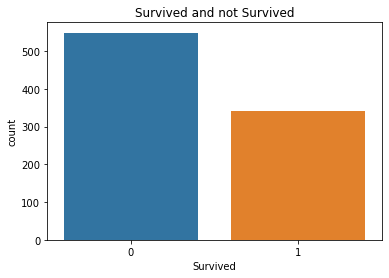

In [22]:
#we already imported the libraries in the beginning
#using a seaborn make countplot for survived column
plt.figsize=(5,4)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Survived and not Survived')
sns.countplot('Survived',data=df)
plt.show()

That we come to know that not survived (0)is more than survived(1)column

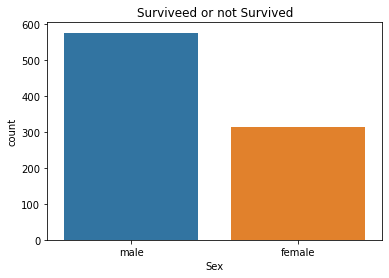

In [24]:
#now checking using seaborn we can check by making countplot for 'Sex'column
plt.figsize=(5,4)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Surviveed or not Survived')
sns.countplot(df['Sex'],data=df)
plt.show()

More Male passengers is not survived when compare to Female passengers.


In [25]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Now we come to know that 577 Males not survived and 314 Females not survived


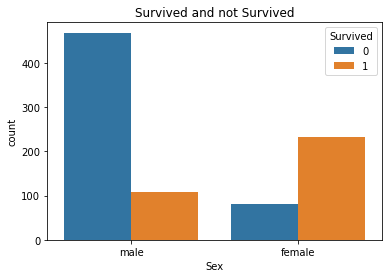

In [27]:
plt.figsize=(5,4)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Survived and not Survived')
sns.countplot('Sex',hue='Survived',data=df)
plt.show()



In [29]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

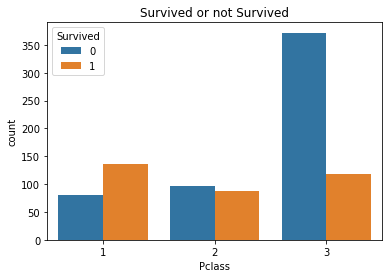

In [28]:
plt.figsize=(5,4)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title("Survived or not Survived")
sns.countplot('Pclass',hue='Survived',data=df)
plt.show()

First class passenger are more survived when compare to second class and thirdclass. Third class passenger are more not survived when compare to firstclass and secondclass.

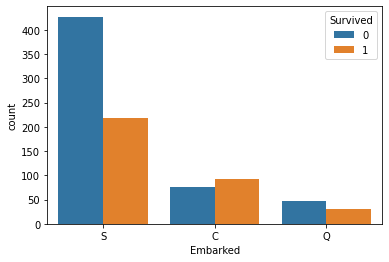

In [30]:
#plotting Embarked column
plt.figsize=(5,4)
plt.ylabel('Count')
plt.xlabel('Class')
sns.countplot('Embarked',hue='Survived',data=df)
plt.show()

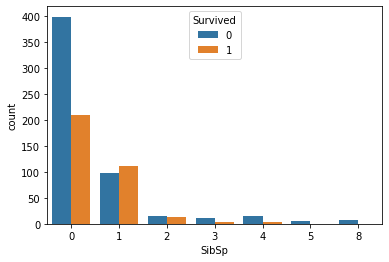

In [32]:
#plotting sibsp column
plt.figsize=(5,4)
plt.ylabel('Count')
plt.xlabel('Class')
sns.countplot('SibSp',hue='Survived',data=df)
plt.show()

In [37]:
#Lets find out the correlation relationship 
corr=df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

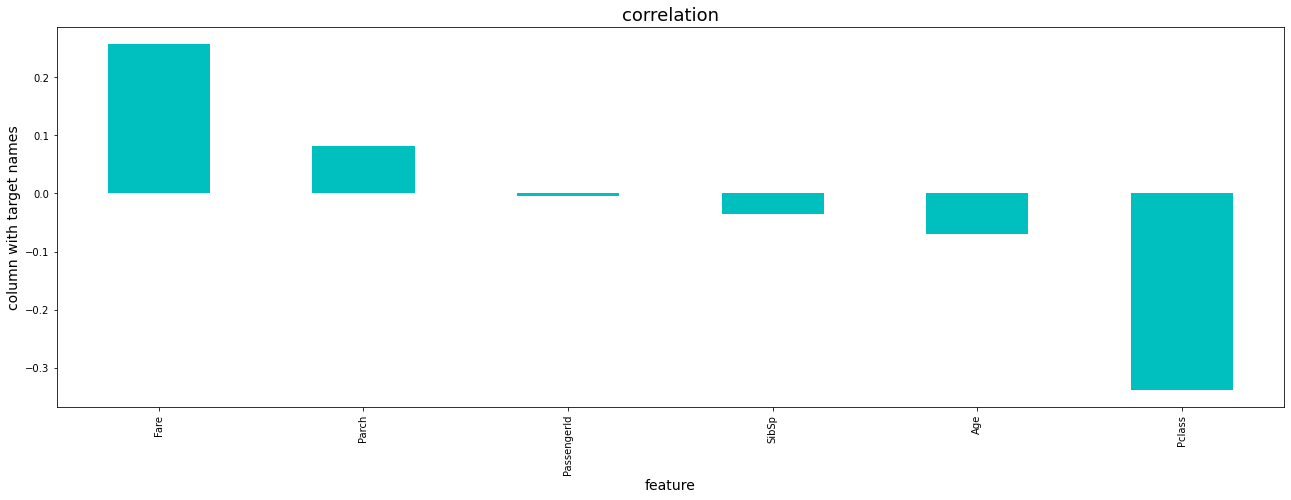

In [34]:
#visualize correlation 
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

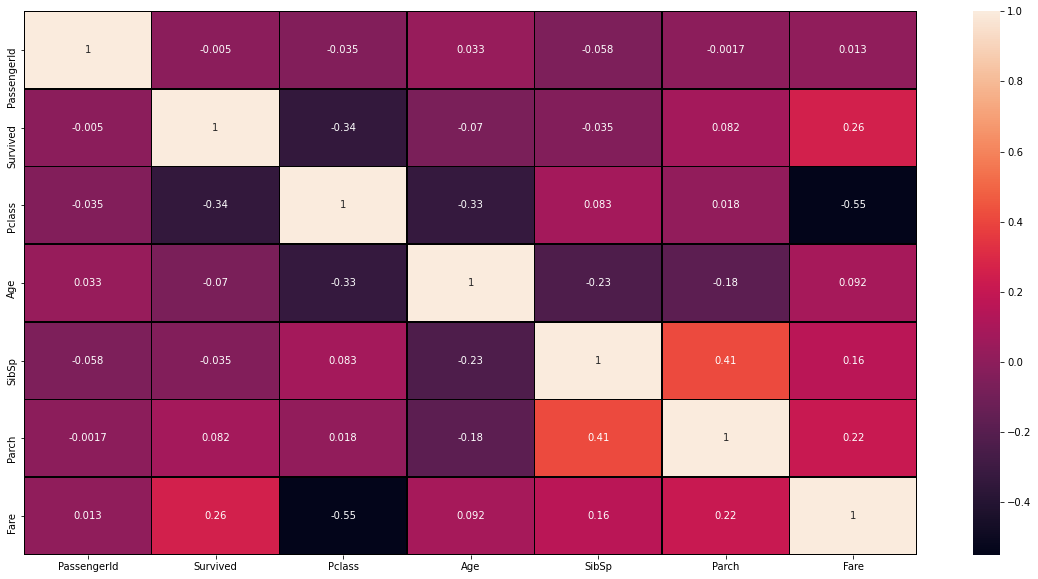

In [40]:
#Using heatmap we can vishualise the correlation between columns
plt.figure(figsize=(20,10))
sns.heatmap(corr,linewidth=0.5,linecolor='black',annot=True)
plt.show()




Observations:

1.There are mostly positive correlations present

2.Highest positive correlation is with source column and target variable, with a value of 41%

3.Survived has the highest negative correlation with Pclass with a value of -34%

4.Positive correlated columns have high impact with target variable, whereas negatively correlated columns have less or zero impact with the target variable

In [42]:
#Converting the categorical into numeric values
#using Encoding method

df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)




In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [44]:
#Separating the feature and target column , as we cannot required some column like name, id , tickets 
#so we can drop that and remainin we can keep as feature column
x=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']


In [45]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [46]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [47]:
#Now checking the skewness 
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked       1.543397
dtype: float64

<AxesSubplot:>

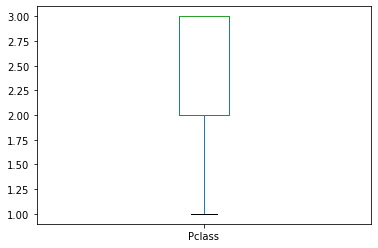

In [49]:
#checking the outliers by ploting boxplot
#Plotting boxplot for checking outliers
df['Pclass'].plot.box()




<AxesSubplot:>

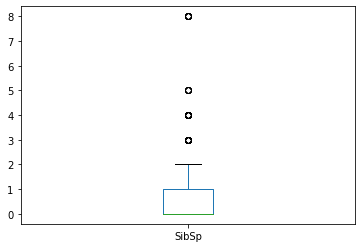

In [50]:
df['SibSp'].plot.box()


<AxesSubplot:>

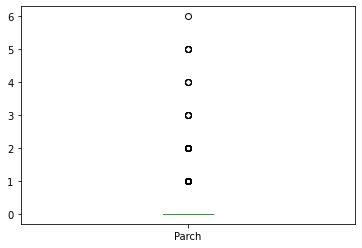

In [51]:
df['Parch'].plot.box()


<AxesSubplot:>

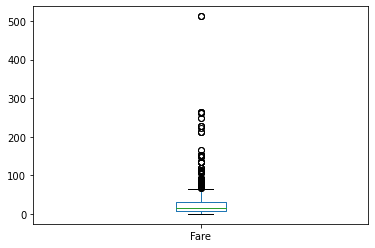

In [52]:
df['Fare'].plot.box()


<AxesSubplot:>

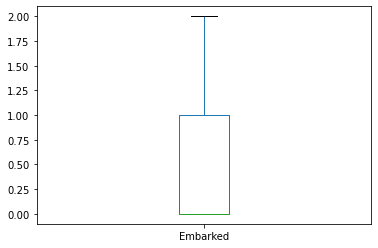

In [54]:
df['Embarked'].plot.box()

Now we find out the outliers which are present in the boxplot

In [66]:
#Remove the outliers through power transform
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x = pd.DataFrame(x_new,columns=x.columns)

In [67]:
x.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of        Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0    0.863973 -0.737695 -0.556267  1.373636 -0.560253 -0.878820 -0.615473
1   -1.459129  1.355574  0.657269  1.373636 -0.560253  1.336651  1.578373
2    0.863973  1.355574 -0.241577 -0.679850 -0.560253 -0.790065 -0.615473
3   -1.459129  1.355574  0.437923  1.373636 -0.560253  1.067352 -0.615473
4    0.863973 -0.737695  0.437923 -0.679850 -0.560253 -0.774439 -0.615473
..        ...       ...       ...       ...       ...       ...       ...
886 -0.592604 -0.737695 -0.164262 -0.679850 -0.560253 -0.294907 -0.615473
887 -1.459129  1.355574 -0.798775 -0.679850 -0.560253  0.527906 -0.615473
888  0.863973  1.355574  0.042001  1.373636  1.846856  0.288885 -0.615473
889 -1.459129 -0.737695 -0.241577 -0.679850 -0.560253  0.527906  1.578373
890  0.863973 -0.737695  0.215254 -0.679850 -0.560253 -0.812349  1.719856

[891 rows x 7 columns]>

In [68]:
x.skew()

Pclass     -0.441438
Sex         0.618921
Age         0.064420
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked    1.013716
dtype: float64

More outliers are removed


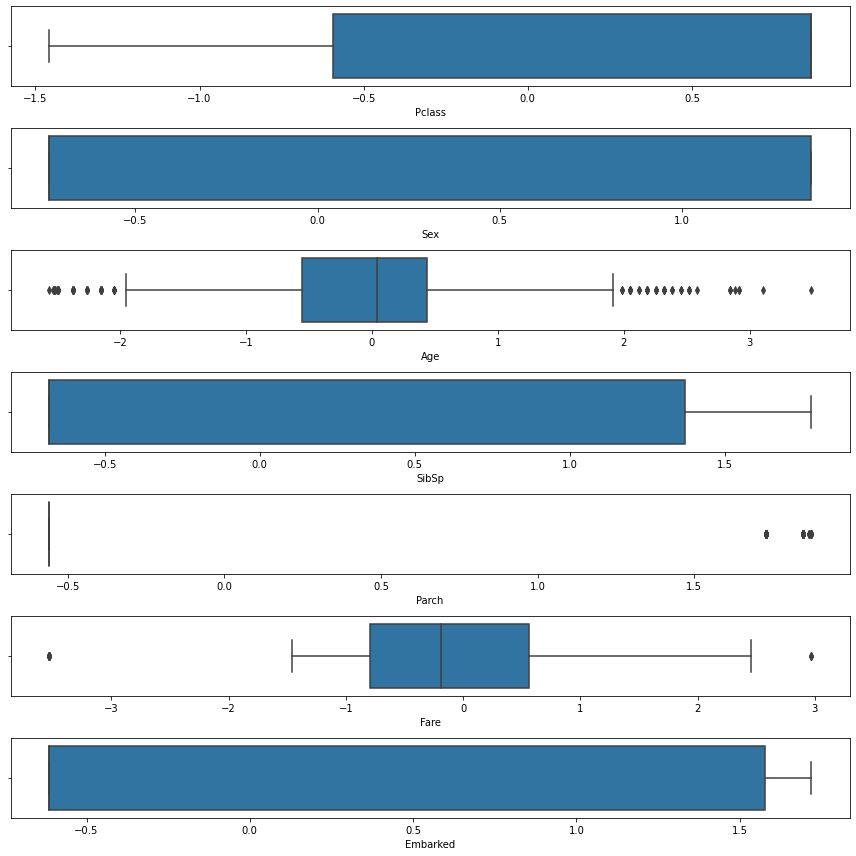

In [64]:
#check outliers in box plot
fig, axs = plt.subplots(7, figsize = (12,12))
plt1 = sns.boxplot(x_new['Pclass'], ax = axs[0])
plt2 = sns.boxplot(x_new['Sex'], ax = axs[1])
plt3 = sns.boxplot(x_new['Age'], ax = axs[2])
plt4 = sns.boxplot(x_new['SibSp'], ax = axs[3])
plt5 = sns.boxplot(x_new['Parch'], ax = axs[4])
plt6 = sns.boxplot(x_new['Fare'], ax = axs[5])
plt7 = sns.boxplot(x_new['Embarked'], ax = axs[6])
plt.tight_layout()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [74]:
from sklearn.model_selection import train_test_split


In [75]:
#splittting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [76]:
x.shape,x_train.shape,x_test.shape

((891, 7), (712, 7), (179, 7))

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score





In [80]:
#Train result
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_train)
accuracy = classification_report(y_train,y_pred)
print(accuracy)
print(confusion_matrix(y_train,y_pred))

KNN=KNeighborsClassifier()
KNN.fit(x_test,y_test)
y_pred=KNN.predict(x_test)
accuracy=classification_report(y_test,y_pred)
print(accuracy)
print(confusion_matrix(y_test,y_pred))








              precision    recall  f1-score   support

           0       0.86      0.92      0.89       439
           1       0.86      0.76      0.81       273

    accuracy                           0.86       712
   macro avg       0.86      0.84      0.85       712
weighted avg       0.86      0.86      0.86       712

[[405  34]
 [ 66 207]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

[[99 11]
 [21 48]]


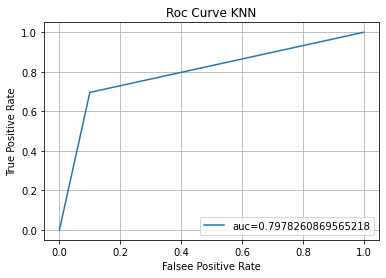

The Score for the Roc curve is : 79.78%


In [85]:
#roc_curve plot to check the score of knn
fpr,tpr,_=roc_curve(y_test,y_pred)
auc_score=roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label='auc='+str(auc_score))
plt.box(True)
plt.title("Roc Curve KNN")
plt.xlabel("Falsee Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the Roc curve is : {}%'.format(round(auc_score,4)*100))




In [84]:
#Train result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#Test result
RFC = RandomForestClassifier()
RFC.fit(x_test, y_test)
y_pred =KNN .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       439
           1       0.99      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

[[436   3]
 [ 10 263]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

[[99 11]
 [21 48]]


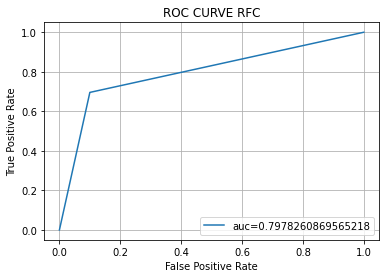

The Score for the ROC Curve is : 79.78%


In [87]:

#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [89]:
#Train result
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
y_pred =DTC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#Test result
DTC = RandomForestClassifier()
DTC.fit(x_test, y_test)
y_pred =DTC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       439
           1       1.00      0.95      0.98       273

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

[[439   0]
 [ 13 260]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

[[110   0]
 [  0  69]]


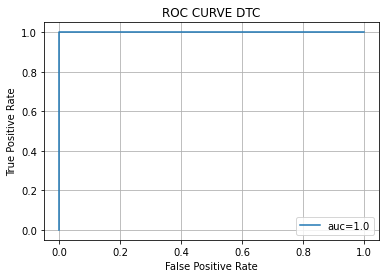

The Score for the ROC Curve is : 100.0%


In [90]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE DTC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [91]:
#Train result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#Test result
LR = LogisticRegression()
LR.fit(x_test, y_test)
y_pred =DTC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       439
           1       0.77      0.70      0.73       273

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

[[382  57]
 [ 83 190]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

[[110   0]
 [  0  69]]


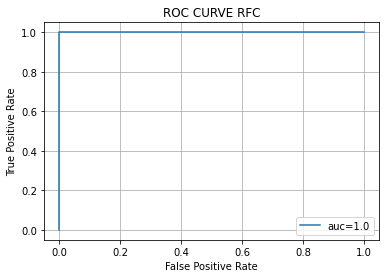

The Score for the ROC Curve is : 100.0%


In [92]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [93]:
print(cross_val_score(KNN,x,y,cv=5).mean())

0.8182035026049841


In [94]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8092586780490867


In [95]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8103571652752495


In [96]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.7923859142552256


In [97]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [98]:
params = parameters={'max_depth':list(range(200,400,50)),
            'n_estimators':list(range(10,120,20)),
            'max_features': ['auto', 'sqrt', 'log2'],      
         }

In [99]:
model=RandomForestClassifier()

In [100]:
grid_clf=GridSearchCV(model,parameters,verbose=4,refit=True)

In [101]:
grid_clf.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=10;, score=0.776 total time=   0.0s
[CV 2/5] END max_depth=200, max_features=auto, n_estimators=10;, score=0.804 total time=   0.0s
[CV 3/5] END max_depth=200, max_features=auto, n_estimators=10;, score=0.796 total time=   0.0s
[CV 4/5] END max_depth=200, max_features=auto, n_estimators=10;, score=0.768 total time=   0.0s
[CV 5/5] END max_depth=200, max_features=auto, n_estimators=10;, score=0.817 total time=   0.0s
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=30;, score=0.776 total time=   0.0s
[CV 2/5] END max_depth=200, max_features=auto, n_estimators=30;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=200, max_features=auto, n_estimators=30;, score=0.796 total time=   0.0s
[CV 4/5] END max_depth=200, max_features=auto, n_estimators=30;, score=0.754 total time=   0.0s
[CV 5/5] END max_depth=200, max_features=auto, n_estimators=30;, score=0.8

[CV 1/5] END max_depth=200, max_features=log2, n_estimators=110;, score=0.776 total time=   0.2s
[CV 2/5] END max_depth=200, max_features=log2, n_estimators=110;, score=0.783 total time=   0.2s
[CV 3/5] END max_depth=200, max_features=log2, n_estimators=110;, score=0.796 total time=   0.2s
[CV 4/5] END max_depth=200, max_features=log2, n_estimators=110;, score=0.754 total time=   0.2s
[CV 5/5] END max_depth=200, max_features=log2, n_estimators=110;, score=0.838 total time=   0.2s
[CV 1/5] END max_depth=250, max_features=auto, n_estimators=10;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=250, max_features=auto, n_estimators=10;, score=0.790 total time=   0.0s
[CV 3/5] END max_depth=250, max_features=auto, n_estimators=10;, score=0.810 total time=   0.0s
[CV 4/5] END max_depth=250, max_features=auto, n_estimators=10;, score=0.761 total time=   0.0s
[CV 5/5] END max_depth=250, max_features=auto, n_estimators=10;, score=0.824 total time=   0.0s
[CV 1/5] END max_depth=250, max_fea

[CV 2/5] END max_depth=250, max_features=log2, n_estimators=90;, score=0.797 total time=   0.2s
[CV 3/5] END max_depth=250, max_features=log2, n_estimators=90;, score=0.796 total time=   0.2s
[CV 4/5] END max_depth=250, max_features=log2, n_estimators=90;, score=0.746 total time=   0.2s
[CV 5/5] END max_depth=250, max_features=log2, n_estimators=90;, score=0.824 total time=   0.2s
[CV 1/5] END max_depth=250, max_features=log2, n_estimators=110;, score=0.783 total time=   0.2s
[CV 2/5] END max_depth=250, max_features=log2, n_estimators=110;, score=0.797 total time=   0.2s
[CV 3/5] END max_depth=250, max_features=log2, n_estimators=110;, score=0.796 total time=   0.2s
[CV 4/5] END max_depth=250, max_features=log2, n_estimators=110;, score=0.761 total time=   0.1s
[CV 5/5] END max_depth=250, max_features=log2, n_estimators=110;, score=0.831 total time=   0.2s
[CV 1/5] END max_depth=300, max_features=auto, n_estimators=10;, score=0.797 total time=   0.0s
[CV 2/5] END max_depth=300, max_fea

[CV 3/5] END max_depth=300, max_features=log2, n_estimators=70;, score=0.810 total time=   0.1s
[CV 4/5] END max_depth=300, max_features=log2, n_estimators=70;, score=0.754 total time=   0.1s
[CV 5/5] END max_depth=300, max_features=log2, n_estimators=70;, score=0.838 total time=   0.1s
[CV 1/5] END max_depth=300, max_features=log2, n_estimators=90;, score=0.776 total time=   0.1s
[CV 2/5] END max_depth=300, max_features=log2, n_estimators=90;, score=0.804 total time=   0.1s
[CV 3/5] END max_depth=300, max_features=log2, n_estimators=90;, score=0.803 total time=   0.1s
[CV 4/5] END max_depth=300, max_features=log2, n_estimators=90;, score=0.761 total time=   0.1s
[CV 5/5] END max_depth=300, max_features=log2, n_estimators=90;, score=0.824 total time=   0.1s
[CV 1/5] END max_depth=300, max_features=log2, n_estimators=110;, score=0.790 total time=   0.1s
[CV 2/5] END max_depth=300, max_features=log2, n_estimators=110;, score=0.804 total time=   0.1s
[CV 3/5] END max_depth=300, max_featur

[CV 4/5] END max_depth=350, max_features=log2, n_estimators=50;, score=0.768 total time=   0.0s
[CV 5/5] END max_depth=350, max_features=log2, n_estimators=50;, score=0.838 total time=   0.0s
[CV 1/5] END max_depth=350, max_features=log2, n_estimators=70;, score=0.783 total time=   0.1s
[CV 2/5] END max_depth=350, max_features=log2, n_estimators=70;, score=0.804 total time=   0.0s
[CV 3/5] END max_depth=350, max_features=log2, n_estimators=70;, score=0.810 total time=   0.1s
[CV 4/5] END max_depth=350, max_features=log2, n_estimators=70;, score=0.761 total time=   0.1s
[CV 5/5] END max_depth=350, max_features=log2, n_estimators=70;, score=0.831 total time=   0.1s
[CV 1/5] END max_depth=350, max_features=log2, n_estimators=90;, score=0.776 total time=   0.1s
[CV 2/5] END max_depth=350, max_features=log2, n_estimators=90;, score=0.804 total time=   0.1s
[CV 3/5] END max_depth=350, max_features=log2, n_estimators=90;, score=0.810 total time=   0.1s
[CV 4/5] END max_depth=350, max_features

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [200, 250, 300, 350],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 70, 90, 110]},
             verbose=4)

In [102]:
clf=grid_clf.best_estimator_
print(clf)

RandomForestClassifier(max_depth=250, n_estimators=30)


In [103]:
clf=grid_clf.best_params_
print(clf)

{'max_depth': 250, 'max_features': 'auto', 'n_estimators': 30}


In [104]:
clf = RandomForestClassifier(max_depth=200, n_estimators=10)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8324022346368715

In [105]:
y_pred=clf.predict(x_train)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [106]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [107]:
accuracy_score(y_test,y_pred)

0.8324022346368715

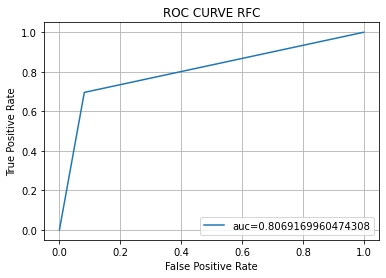

The Score for the ROC Curve is : 80.69%


In [108]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [109]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8047391877471595


RandomForestClassifier model is the best accuracy result to be my final model

In [110]:
import joblib
joblib.dump(clf,'titanik.pkl')

['titanik.pkl']